# Importing libraries and data

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4300,"PowerDirector Video Editor App: 4K, Slow Mo & ...",VIDEO_PLAYERS,4.5,712737,50M,"10,000,000+",Free,0,Everyone,Video Players & Editors,"July 24, 2018",4.13.3,4.3 and up
2919,HD Camera for Android,PHOTOGRAPHY,4.1,351255,4.0M,"10,000,000+",Free,0,Everyone,Photography,"June 29, 2018",4.6.0.0,4.2 and up
6131,BG Monitor Diabetes,MEDICAL,4.4,643,2.8M,"10,000+",Free,0,Everyone,Medical,"April 23, 2017",8.0.1,4.4 and up
7444,CJ the REALTOR,BUSINESS,5.0,1,4.2M,10+,Free,0,Everyone,Business,"May 31, 2017",1.0.8,4.0.3 and up


In [3]:
df['Size'].str[-1].unique()

array(['M', 'e', 'k', '+'], dtype=object)

# Data Cleaning

## 1.1 Investigation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(483)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Notes
- 483 duplicated row
- `Price`, `Size`, and `Android Ver` columns are mixed with string 
    - `Size` column is in multiple units
    - `Size` and `Android Ver` columns have rows with the content "Varies with device"
- `Last Updated` column needs to be converted to date
- `Reviews` column needs to be converted to integer
- `Installs` column needs to be converted to integer with removing '+'
- `Current Ver` column won't be converted to float since it is refers to the development of each app indinvidually

## 1.2 Solving data issues

### Dropping duplicated Rows

In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

np.int64(0)

### Working with the Size column


In [8]:
df['Size'].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [9]:
df[df['Size'].str.endswith('e')].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2719,Google Trips - Travel Planner,TRAVEL_AND_LOCAL,4.1,26871,Varies with device,"5,000,000+",Free,0,Everyone,Travel & Local,"July 26, 2018",1.10.0.205086730,4.1 and up
2288,Text Free: WiFi Calling App,SOCIAL,4.2,83488,Varies with device,"5,000,000+",Free,0,Everyone,Social,"July 24, 2018",Varies with device,Varies with device
5062,QR Droid,PRODUCTIVITY,4.1,349151,Varies with device,"50,000,000+",Free,0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
6195,IKEA Store,SHOPPING,3.4,25515,Varies with device,"10,000,000+",Free,0,Everyone,Shopping,"July 16, 2018",Varies with device,Varies with device
4532,Mobi Calculator free & AD free!,TOOLS,4.6,77302,Varies with device,"5,000,000+",Free,0,Everyone,Tools,"January 9, 2018",Varies with device,Varies with device


In [10]:
df[df['Size'].str.endswith('+')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### So i have noticed that this row is shifted to the right starting from the category 

In [11]:
# Fixing the shift in the row by keeping the first value which is the name then add null value to the category then the rest of the row
row = df.iloc[9990].copy()
new_row = [row[0]] + [np.nan] + list(row[1:-1])   # Takes from the second value to the one before last since the last is null
df.iloc[9990] = new_row

C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\903078688.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_row = [row[0]] + [np.nan] + list(row[1:-1])   # Takes from the second value to the one before last since the last is null
C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\903078688.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[9990] = new_row


In [12]:
df.iloc[9990]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9990, dtype: object

- now all the values ends with 'e' which is varies with device will be replaced with NaN
- the size column will be converted to float
- The whole column will be in 'M' unit
    - M = K / 1024

In [13]:
def cleanSize(size):
    if size.endswith('e'):
        size = np.nan
        return size
    if size.endswith('k'):
        size = float(size.strip('k')) / 1024
        return size
    size = float(size.strip('M'))
    return size

df['Size'] = df['Size'].apply(cleanSize)
df['Size'].sample(20)

7247      3.400000
5922      3.100000
2237      6.100000
1727     61.000000
4873      3.600000
4394     29.000000
9409     65.000000
695      10.000000
7149     40.000000
6038           NaN
4341           NaN
3017           NaN
3008      3.300000
353      25.000000
840      57.000000
4693      0.310547
7542           NaN
4387     96.000000
3909     63.000000
10064    26.000000
Name: Size, dtype: float64

In [14]:
df["Size"].isna().sum()

np.int64(1526)

- Now all the values of the Size column are float and in 'M' unit
- There is 1527 null values in the Size column

### Converting the rest of numerical columns to float

In [15]:
df['Price'].value_counts()
# this column is mostly zeros (Exactly 88%) but i will keep it cause it may give insights on other columns like intalls or rating


Price
0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$3.61         1
$394.99       1
$1.26         1
$1.20         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [16]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

> the `Price` column is mostly zeros (Exactly 88%) but i will keep it cause it may give insights on other columns like installs or rating

In [17]:
# Converting Price to float
df["Price"] = df["Price"].apply(lambda x : float(x.strip('$')))
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [18]:
# Converting Reviews column to float
df["Reviews"] = df['Reviews']. apply(lambda x : int(x))
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10353        38
10354         4
10355         3
10356       114
10357    398307
Name: Reviews, Length: 10358, dtype: int64

In [19]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

> Here i will create a new column which contains only the minimum android version needed

> Varies with device will be replaced with NaN

In [20]:
df["Android Ver"] = df["Android Ver"].replace("Varies with device", np.nan)
df["min android ver"] = df["Android Ver"].str.split().str[0]

In [21]:
df["min android ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', nan,
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [22]:
df.loc[df["min android ver"] == '4.4W'].count()

App                11
Category           11
Rating              5
Reviews            11
Size               11
Installs           11
Type               11
Price              11
Content Rating     11
Genres             11
Last Updated       11
Current Ver        11
Android Ver        11
min android ver    11
dtype: int64

> The android version "4.4W" is a valid android version which is 4.4 but for smart watches so i will convert it to normal 4.4 since they are only 11 rows out of 10841 row 

In [23]:
# fixing the value 4.4W
df["min android ver"] = df["min android ver"].apply(lambda x: x.strip('W') if isinstance(x, str) else x)
df["min android ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', nan,
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1', '1.0'], dtype=object)

> Converting it to float with neglecting the third number in the version since it is only the patch level not the version

In [24]:
df["min android ver"] = df["min android ver"].apply(lambda x: float('.'.join(x.split('.')[:2])) if isinstance(x, str) else x)
df["min android ver"].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, nan, 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

> Converting rating to float

In [25]:
df["Rating"] = df["Rating"].astype(float)
df["Rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10358 entries, 0 to 10357
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
8893 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


> Converting Installs column in another column called `installs range`

In [26]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [27]:
df["installs range"] = df["Installs"].str.strip('+').str.replace(',', '').astype(int)
df["installs range"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: installs range, Length: 10358, dtype: int64

### Converting `Last Updated` to date

In [28]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10358, dtype: datetime64[ns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10358 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8893 non-null   float64       
 3   Reviews          10358 non-null  int64         
 4   Size             8832 non-null   float64       
 5   Installs         10358 non-null  object        
 6   Type             10357 non-null  object        
 7   Price            10358 non-null  float64       
 8   Content Rating   10358 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10358 non-null  datetime64[ns]
 11  Current Ver      10350 non-null  object        
 12  Android Ver      9135 non-null   object        
 13  min android ver  9135 non-null   float64       
 14  installs range   10358 non-null  int64

In [30]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated,min android ver,installs range
count,8893.000000,1.035800e+04,8832.000000,10358.000000,10358,9135.000000,1.035800e+04
mean,4.187619,4.058654e+05,21.285343,1.030701,2017-11-14 09:37:38.428268032,3.853432,1.415639e+07
min,1.000000,0.000000e+00,0.008301,0.000000,2010-05-21 00:00:00,1.000000,0.000000e+00
25%,4.000000,3.200000e+01,4.700000,0.000000,2017-09-03 00:00:00,4.000000,1.000000e+03
50%,4.300000,1.678500e+03,13.000000,0.000000,2018-05-20 00:00:00,4.100000,1.000000e+05
75%,4.500000,4.640425e+04,29.000000,0.000000,2018-07-19 00:00:00,4.100000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00,8.000000,1.000000e+09
std,0.522910,2.696651e+06,22.540155,16.277843,NaN,0.842739,8.023580e+07


### Checking Consistency in categorical columns

##### Checking `Category` with it's nulls

In [31]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [32]:
df.loc[df["Category"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0,"1,000+",Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,4.0,1000


##### Checking `Type` with it's nulls

In [33]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [34]:
df.loc[df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
8667,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,NaN,NaN,0


#### Checking `Content Rating` with it's nulls

In [35]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Checking `Genres` with it's nulls

In [36]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [37]:
df.loc[df["Genres"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0,"1,000+",Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,4.0,1000


> Converting `Genres` column to hold lists of genres since they are separated with ';'

In [38]:
df["Genres"] = df["Genres"].str.split(';')
df["Genres"].sample(20)

8882              [Entertainment]
5566                     [Sports]
9668    [Video Players & Editors]
674                   [Education]
4184          [Maps & Navigation]
3314           [News & Magazines]
266                      [Comics]
3354           [News & Magazines]
7337               [Productivity]
4470                   [Business]
4150                      [Tools]
3057               [Productivity]
25                 [Art & Design]
261                    [Business]
4173                     [Social]
1004                    [Finance]
2773             [Travel & Local]
2821                      [Tools]
7134                     [Arcade]
7244                      [Tools]
Name: Genres, dtype: object

> Dropping the nulls of these columns since they have only one null per column

In [39]:
df = df.dropna(subset=(['Category', "Type", "Genres"]))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10356 non-null  object        
 1   Category         10356 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10356 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10356 non-null  object        
 6   Type             10356 non-null  object        
 7   Price            10356 non-null  float64       
 8   Content Rating   10356 non-null  object        
 9   Genres           10356 non-null  object        
 10  Last Updated     10356 non-null  datetime64[ns]
 11  Current Ver      10348 non-null  object        
 12  Android Ver      9134 non-null   object        
 13  min android ver  9134 non-null   float64       
 14  installs range   10356 non-null  int64     

In [41]:
df["Current Ver"].sample(20)

3326                 7.5.0
9099                 1.0.9
1079                 4.2.6
6323                   2.2
4860       3.7.10-0d44b899
7587                5.1.10
2681    Varies with device
2391    Varies with device
2372    Varies with device
6954                   1.0
4348                  2.94
9261                   1.1
233                  1.5.2
998                  4.2.1
6949                   1.0
3296    Varies with device
4879                 2.137
7235                   1.1
6012                 1.3.3
8716                 1.0.0
Name: Current Ver, dtype: object

In [42]:
df["Current Ver"] = df["Current Ver"].replace("Varies with device", np.nan)

#### Dealing with the nulls

In [43]:
df.isna().sum()

App                   0
Category              0
Rating             1464
Reviews               0
Size               1525
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver        1309
Android Ver        1222
min android ver    1222
installs range        0
dtype: int64

In [44]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated,min android ver,installs range
count,8892.000000,1.035600e+04,8831.000000,10356.000000,10356,9134.000000,1.035600e+04
mean,4.187877,4.059438e+05,21.287413,1.030900,2017-11-14 08:53:57.079953664,3.853416,1.415913e+07
min,1.000000,0.000000e+00,0.008301,0.000000,2010-05-21 00:00:00,1.000000,0.000000e+00
25%,4.000000,3.200000e+01,4.700000,0.000000,2017-09-02 18:00:00,4.000000,1.000000e+03
50%,4.300000,1.683000e+03,13.000000,0.000000,2018-05-20 00:00:00,4.100000,1.000000e+05
75%,4.500000,4.643825e+04,29.000000,0.000000,2018-07-19 00:00:00,4.100000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00,8.000000,1.000000e+09
std,0.522377,2.696905e+06,22.540591,16.279408,NaN,0.842784,8.024331e+07


> Filling the nulls in `Rating` column with the **median** since it is not in normal distribution as the mean is so high

In [45]:
df["Rating"].fillna(df["Rating"].median(), inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\14277655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].median(), inplace=True)


> Filling the nulls in `Size` column to be the average app size

In [46]:
df["Size"].fillna(df["Size"].mean(), inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\370028815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size"].fillna(df["Size"].mean(), inplace=True)


> Filling the nulls in `min android ver` column with it's mode to match the versions which the most apps uses

In [47]:
df["min android ver"].fillna(df["min android ver"].mode()[0], inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\8520350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["min android ver"].fillna(df["min android ver"].mode()[0], inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10356 non-null  object        
 1   Category         10356 non-null  object        
 2   Rating           10356 non-null  float64       
 3   Reviews          10356 non-null  int64         
 4   Size             10356 non-null  float64       
 5   Installs         10356 non-null  object        
 6   Type             10356 non-null  object        
 7   Price            10356 non-null  float64       
 8   Content Rating   10356 non-null  object        
 9   Genres           10356 non-null  object        
 10  Last Updated     10356 non-null  datetime64[ns]
 11  Current Ver      9047 non-null   object        
 12  Android Ver      9134 non-null   object        
 13  min android ver  10356 non-null  float64       
 14  installs range   10356 non-null  int64     

> I am leaving the nulls in `Current Ver` and `Android Ver` since they will be dropped as they will not be usefull

# Answering analytical questions

### 1. What is the most expecsive app on the Play Store

In [61]:
df.loc[df["Price"] == df["Price"].max(),["App", "Price"]]


,App,Price
3913,I'm Rich - Trump Edition,400.0


### 2. Which genre has the highest number of apps

In [90]:
genre_counts = df.explode('Genres')['Genres'].value_counts()
genre_counts.head(1)

Genres
Tools    843
Name: count, dtype: int64

### 3. what is the average size of free vs. paid apps?

In [70]:
df_free_paid = df.groupby("Type", as_index=False)["Size"].mean()
df_free_paid

,Type,Size
0,Free,21.443305
1,Paid,19.332960


C:\Users\Youssif\AppData\Local\Temp\ipykernel_12212\306344427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_free_paid, x = "Type", y="Size", palette="viridis")


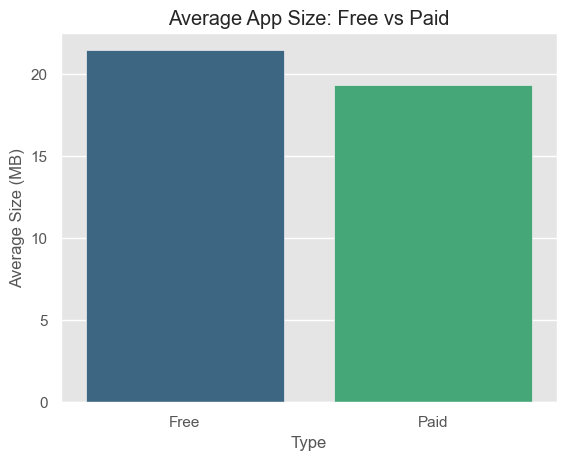

In [95]:
sns.barplot(data=df_free_paid, x = "Type", y="Size", palette="viridis")
plt.title('Average App Size: Free vs Paid')
plt.ylabel('Average Size (MB)')
plt.show()

### 4. What are the top 5 most expensive apps with a perfect rating (5)?

In [98]:
df_perfect = df.loc[df["Rating"] == 5].sort_values("Price", ascending=False)
df_perfect.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
5033,AP Art History Flashcards,FAMILY,5.0,1,96.000000,10+,Paid,29.99,Mature 17+,[Education],2016-01-19,3.30,4.0 and up,4.0,10
7008,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000000,10+,Paid,19.99,Everyone,[Education],2014-05-26,2.47,2.2 and up,2.2,10
5026,meStudying: AP English Lit,FAMILY,5.0,1,0.639648,10+,Paid,4.99,Everyone,[Education],2013-08-31,1.3,2.0.1 and up,2.0,10
6735,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.000000,100+,Paid,4.99,Everyone,[Education],2018-03-28,1.5.2,4.1 and up,4.1,100
4790,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.000000,10+,Paid,4.99,Everyone,[Education],2018-04-04,1.0.59,2.3 and up,2.3,10


In [ ]:
px.bar(
    df_perfect.head(5),
    x="App",
    y="Price",
    title="Top 5 Most Expensive Apps with Perfect Rating (5)",
    text="Price",
)

### 5.	How many apps have received more than 50K reviews?

In [117]:
df.loc[df["Reviews"] > 50000].shape[0]

2525

### 6. What is the average price of apps, grouped by genre and number of installs?

In [136]:
df_exploded = df.explode('Genres')
df_avg_price = df_exploded.groupby(["Genres", "installs range"], as_index=False)["Price"].mean()
df_avg_price

,Genres,installs range,Price
0,Action,10,0.000000
1,Action,50,0.663333
2,Action,100,1.096000
3,Action,500,0.995000
4,Action,1000,0.372500
...,...,...,...
758,Word,100000,0.000000
759,Word,1000000,0.000000
760,Word,5000000,0.000000
761,Word,10000000,0.000000
